In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Questão 4

In [34]:
#Variáveis Globais

n = 1000
z = np.linspace(0, 10, n)
c = 300000000
H0 = 70
Dh = c / (1000*H0)

In [3]:
def Inv_E(zi):
    "Calcula o inverso da função de Hubble normalizada para um determinado modelo"
    
    Omega_k = 1 - Omega_r - Omega_m - Omega_L

    f1 = Omega_r*(1 + zi)**4 + Omega_m*(1 + zi)**3 + Omega_L + Omega_k*(1 + zi)**2

    f2 = np.sqrt(f1)
    
    return 1/f2


In [4]:
def integral(f, z_a):
    "Integra a função f no intervalo [z_i, z_f] com os valores retirados da lista"

    n = len(z_a)
    
    dx = z_a[1] - z_a[0]

    I1 = ( f(z_a[0]) + f(z_a[n - 1]) )*dx/3
    I2 = 0
    
    for i in range(2, n - 1):
        if i % 2 == 0:
            I2 += (4/3) * dx * f(z_a[i])

        else:
            I2 += (2/3) * dx * f(z_a[i])

    I = I1 + I2
        
    return I

In [5]:
def D_c():
    "Cria uma lista com a distância Comóvel"
    
    dc = [0]*n
    
    for i in range(1, n):
        dc[i] = Dh * integral(Inv_E, z[0:i+1])  #A distância será a integral até um redshift z_f

    return dc

In [10]:
def D_m(dc):
    "Cria uma lista com a distância Comóvel Transversa"

    dm = [0]*n
    
    for i in range(1, n):
        if Omega_k > 0:
        
            dm[i] = Dh * ( 1 / (np.sqrt(Omega_k)) ) * np.sinh( np.sqrt(Omega_k) * dc[i] / Dh )
        
        elif Omega_k == 0:
        
            dm[i] = dc[i]
        
        else:
            
            dm[i] = Dh * ( 1 / (np.sqrt( abs(Omega_k) )) ) * np.sin( np.sqrt( abs(Omega_k) ) * dc[i] / Dh )

    return dm
    

In [7]:
def D_a(dm):
    "Cria uma lista com a distância Diâmetro Angular"

    da = [0]*n
    
    for i in range(1, n):
        da[i] = dm[i] / (1 + z[i])

    return da

In [8]:
def D_l(dm):
    "Cria uma lista com a distância Comóvel"
    dl = [0]*n
    
    for i in range(1, n):
        dl[i] = dm[i] * (1 + z[i])

    return dl

## Modelo $\Lambda$CDM

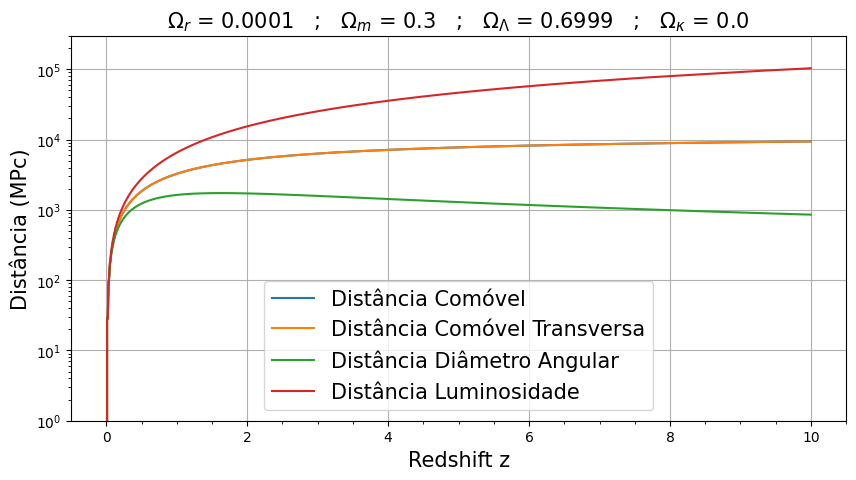

In [47]:
Omega_r = 1e-4
Omega_m = 0.3
Omega_L = 0.6999
Omega_k = 1 - Omega_r - Omega_m - Omega_L


d_c = D_c()
d_m = D_m(d_c)
d_a = D_a(d_m)
d_l = D_l(d_m)


plt.figure(figsize=(10,5))
plt.yscale("log")
plt.plot(z, d_c, label="Distância Comóvel")
plt.plot(z, d_m, label="Distância Comóvel Transversa")
plt.plot(z, d_a, label="Distância Diâmetro Angular")
plt.plot(z, d_l, label="Distância Luminosidade")
plt.grid()
plt.minorticks_on()
plt.ylim(1, 3e5)
plt.ylabel("Distância (MPc)", fontsize = 15)
plt.xlabel("Redshift z", fontsize = 15)
plt.legend(loc=8, fontsize=15)
plt.title(f"$\Omega_r$ = {Omega_r}{';':^7}$\Omega_m$ = {Omega_m}{';':^7}$\Omega_\Lambda$ = {Omega_L}{';':^7}$\Omega_\kappa$ = {Omega_k}", fontsize=15)

# plt.savefig("Modelo_ACDM.pdf")
plt.show()

## Modelo com Curvatura Negativa

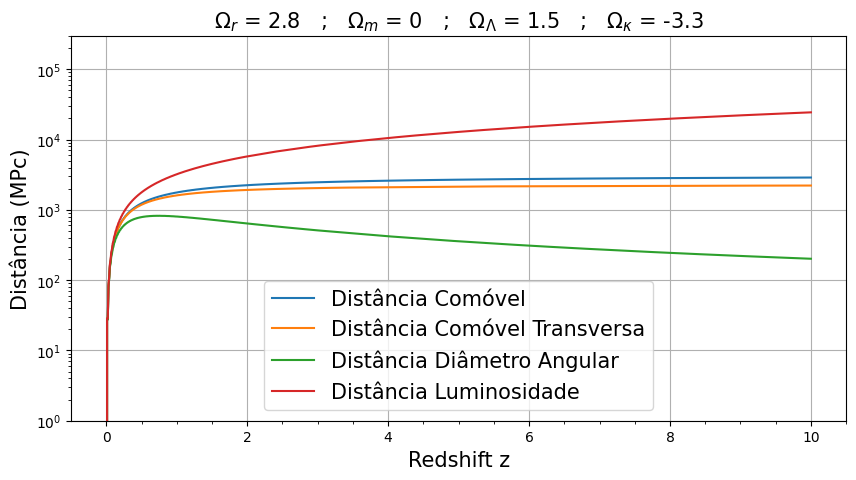

In [50]:
Omega_r = 2.8
Omega_m = 0
Omega_L = 1.5
Omega_k = 1 - Omega_r - Omega_m - Omega_L

d_c = D_c()
d_m = D_m(d_c)
d_a = D_a(d_m)
d_l = D_l(d_m)

plt.figure(figsize=(10,5))
plt.yscale("log")
plt.plot(z, d_c, label="Distância Comóvel")
plt.plot(z, d_m, label="Distância Comóvel Transversa")
plt.plot(z, d_a, label="Distância Diâmetro Angular")
plt.plot(z, d_l, label="Distância Luminosidade")
plt.grid()
plt.minorticks_on()
plt.ylim(1, 3e5)
plt.ylabel("Distância (MPc)", fontsize = 15)
plt.xlabel("Redshift z", fontsize = 15)
plt.title(f"$\Omega_r$ = {Omega_r}{';':^7}$\Omega_m$ = {Omega_m}{';':^7}$\Omega_\Lambda$ = {Omega_L}{';':^7}$\Omega_\kappa$ = {Omega_k}", fontsize=15)


plt.legend(loc=8,fontsize=15)
# plt.savefig("Modelo_k_neg.pdf")
plt.show()

## Modelo com curvatura positiva

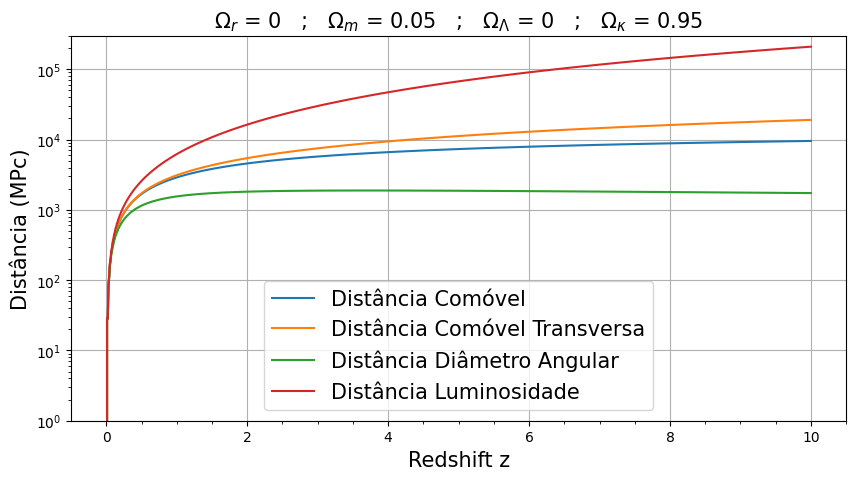

In [57]:
Omega_r = 0
Omega_m = 0.05
Omega_L = 0
Omega_k = 1 - Omega_r - Omega_m - Omega_L


d_c = D_c()
d_m = D_m(d_c)
d_a = D_a(d_m)
d_l = D_l(d_m)


plt.figure(figsize=(10,5))
plt.yscale("log")
plt.plot(z, d_c, label="Distância Comóvel")
plt.plot(z, d_m, label="Distância Comóvel Transversa")
plt.plot(z, d_a, label="Distância Diâmetro Angular")
plt.plot(z, d_l, label="Distância Luminosidade")
plt.grid()
plt.minorticks_on()
plt.ylim(1, 3e5)
plt.ylabel("Distância (MPc)", fontsize = 15)
plt.xlabel("Redshift z", fontsize = 15)
plt.title(f"$\Omega_r$ = {Omega_r}{';':^7}$\Omega_m$ = {Omega_m}{';':^7}$\Omega_\Lambda$ = {Omega_L}{';':^7}$\Omega_\kappa$ = {Omega_k}", fontsize=15)


plt.legend(loc=8,fontsize=15)
# plt.savefig("Modelo_k_pos.pdf")
plt.show()

# Questão 6

Modelo ΛCDM plano com ΩΛ,0 = 0.8 e Ωr,0 = 9.0 × 10−5 e Ωκ,0 = −0.011x (onde x
é a soma de letras no seu nome + último sobrenome)

$$\Omega_x(z) = \frac{\epsilon_x(z)}{\epsilon_{crit}(z)}  = \frac{\epsilon_{x,0}}{\epsilon_{crit,0}}  \frac{(1+z)^{3(1 + w)}}{E^2}= \Omega_{x,0}  \frac{(1+z)^{3(1 + w)}}{\sum_i \Omega_{i,0}(1+z)^{3(1+w_i)}}$$

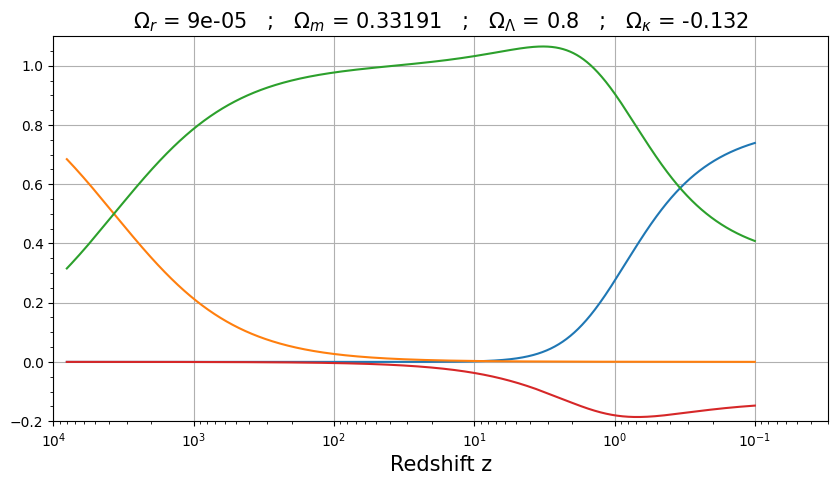

In [112]:
import numpy as np
import matplotlib.pyplot as plt

L = 0.8
r = 9e-5
k = -0.011*12        # Pedro Ribeiro
m = 1 - L - k - r

num = 10000
z_i = np.geomspace(1e-1, 8000, num)


E2 = r*(1 + z_i)**4 + m*(1 + z_i)**3 + L + k*(1 + z_i)**2


Om_L = np.array(L / E2)
Om_m = np.array(m * (1 + z_i)**3 / E2)
Om_r = np.array(r * (1 + z_i)**4 / E2)
Om_k = np.array(k * (1 + z_i)**2 / E2)


plt.figure(figsize=(10,5))
plt.xscale("log")
plt.plot(z_i, Om_L, label="Lambda")
plt.plot(z_i, Om_r, label="Radiação")
plt.plot(z_i, Om_m, label="Matéria")
plt.plot(z_i, Om_k, label="Curvatura")
plt.grid()
plt.minorticks_on()
plt.xlabel("Redshift z", fontsize = 15)
plt.xlim(1e4, 3e-2)
plt.ylim(-0.2, 1.1)

plt.title(f"$\Omega_r$ = {r}{';':^7}$\Omega_m$ = {m}{';':^7}$\Omega_\Lambda$ = {L}{';':^7}$\Omega_\kappa$ = {k}", fontsize=15)


# plt.legend(loc=1,fontsize=15)
# plt.savefig("Q6_1.pdf")
plt.show()

0.4082228332452518
1.082183979


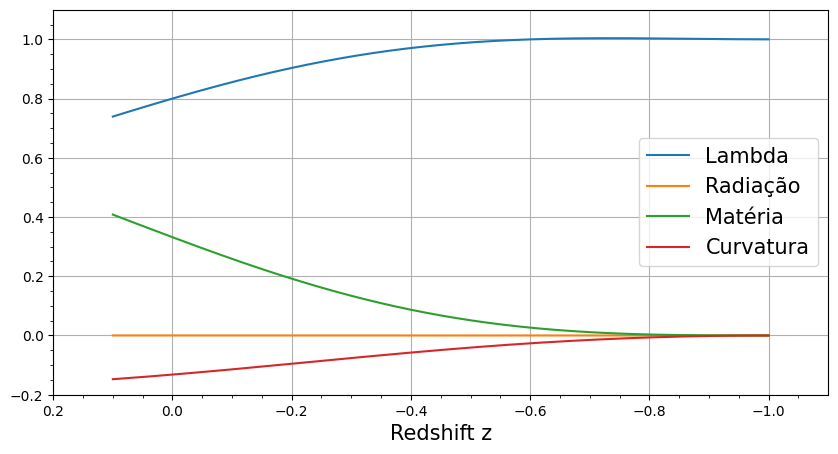

In [113]:
z_j = np.linspace(-1, 1e-1, num)

e2 = r*(1 + z_j)**4 + m*(1 + z_j)**3 + L + k*(1 + z_j)**2
Om = np.array(m * (1 + z_j)**3 / e2)
OL = np.array(L / e2)
Or = np.array(r * (1 + z_j)**4 / e2)
Ok = np.array(k * (1 + z_j)**2 / e2)

print(Om[9999])
print(e2[9999])

plt.figure(figsize=(10,5))
# plt.scale("log")
plt.plot(z_j, OL, label="Lambda")
plt.plot(z_j, Or, label="Radiação")
plt.plot(z_j, Om, label="Matéria")
plt.plot(z_j, Ok, label="Curvatura")
plt.grid()
plt.minorticks_on()
plt.xlabel("Redshift z", fontsize = 15)
plt.xlim(0.2, -1.1)
plt.ylim(-0.2, 1.1)


plt.legend(fontsize=15)
# plt.savefig("Q6_2.pdf")
plt.show()

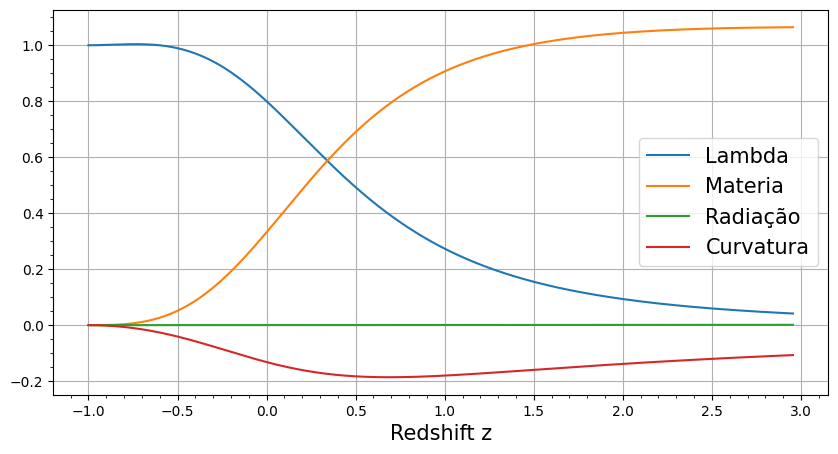

In [100]:
zf = np.concatenate((z_j, z_i))
O_L = np.concatenate((OL, Om_L))
O_m = np.concatenate((Om, Om_m))
O_r = np.concatenate((Or, Om_r))
O_k = np.concatenate((Ok, Om_k))

v = 13000

plt.figure(figsize=(10,5))
plt.plot(zf[0:v], O_L[0:v], label="Lambda")
plt.plot(zf[0:v], O_m[0:v], label="Materia")
plt.plot(zf[0:v], O_r[0:v], label="Radiação")
plt.plot(zf[0:v], O_k[0:v], label="Curvatura")
plt.grid()
plt.minorticks_on()
plt.xlabel("Redshift z", fontsize = 15)

plt.legend(fontsize=15)
plt.show()